---
title: "Plotnine plot contest"
date: "6/25/2024"
categories: [python, plotnine, data]
description: "A very cheesy map made with `plotnine`"
image: output.png
---

[Plotnine](https://plotnine.org/) is running a plot contest! [And it is not too late to enter](https://github.com/has2k1/plotnine/discussions/788), submissions close July 12!


For my submission[^1], I'll start with reading in [cheese data from TidyTuesday](), as well as a csv of longitudes and latitudes of different countries.

In [1]:
import geopandas
import geodatasets

import pandas as pd
import numpy as np

from plotnine import *

cheese = pd.read_csv(
    "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-06-04/cheeses.csv"
)
country_lat_long = pd.read_csv(
    "./world_country_and_usa_states_latitude_and_longitude_values.csv"
)[["latitude", "longitude", "country"]]

Next, some data manipulation to set us up with tidy data to plot.

In [2]:
cheese['country']=cheese['country'].str.split(pat=', ')
cheese['milk']= cheese['milk'].str.split(pat=', ')
cheese = cheese.explode('country').explode('milk')
mode_milk = cheese.groupby('country')['milk'].agg(pd.Series.mode).reset_index()
country_value = cheese["country"].str.split(pat=', ').explode().str.strip().value_counts().reset_index()

In [3]:
cheese_plot = country_value.merge(country_lat_long, how = "left", on="country")
cheese_plot = cheese_plot.merge(mode_milk, how = "left", on = "country").explode('milk')
top_countries = cheese_plot.sort_values("count", ascending=False).replace(["United Kingdom"], ["U.K."]).head(5)

We also will use [`geopandas`](https://geopandas.org/en/v1.0.0/index.html) in order to generate the map itself.

In [4]:
geodatasets.fetch("naturalearth land")
world_lowres = geopandas.read_file(
    "https://github.com/geopandas/geopandas/raw/v0.9.0/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp"
)
world = geopandas.read_file(geodatasets.get_path("naturalearth land"))

Finally, let's use plotnine to put it all together! The main pieces in play are four `geoms_` and then some extra layers to make the plot more readable. A `geom_map` to generate the map, `geom_point` to place each circle depicting number and type of cheeses, and two `geom_text` elements for the country name and number of cheeses. The `scale_size` edits the size of the points in `geom_point` and `scale_colour_brewer` edits the colors of these points. Finally, the theme is a combination of `theme_void` and custom `theme` and `guides` elements. 

/Users/isabelzimmerman/.pyenv/versions/3.11.4/envs/docker/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 11 rows containing missing values.


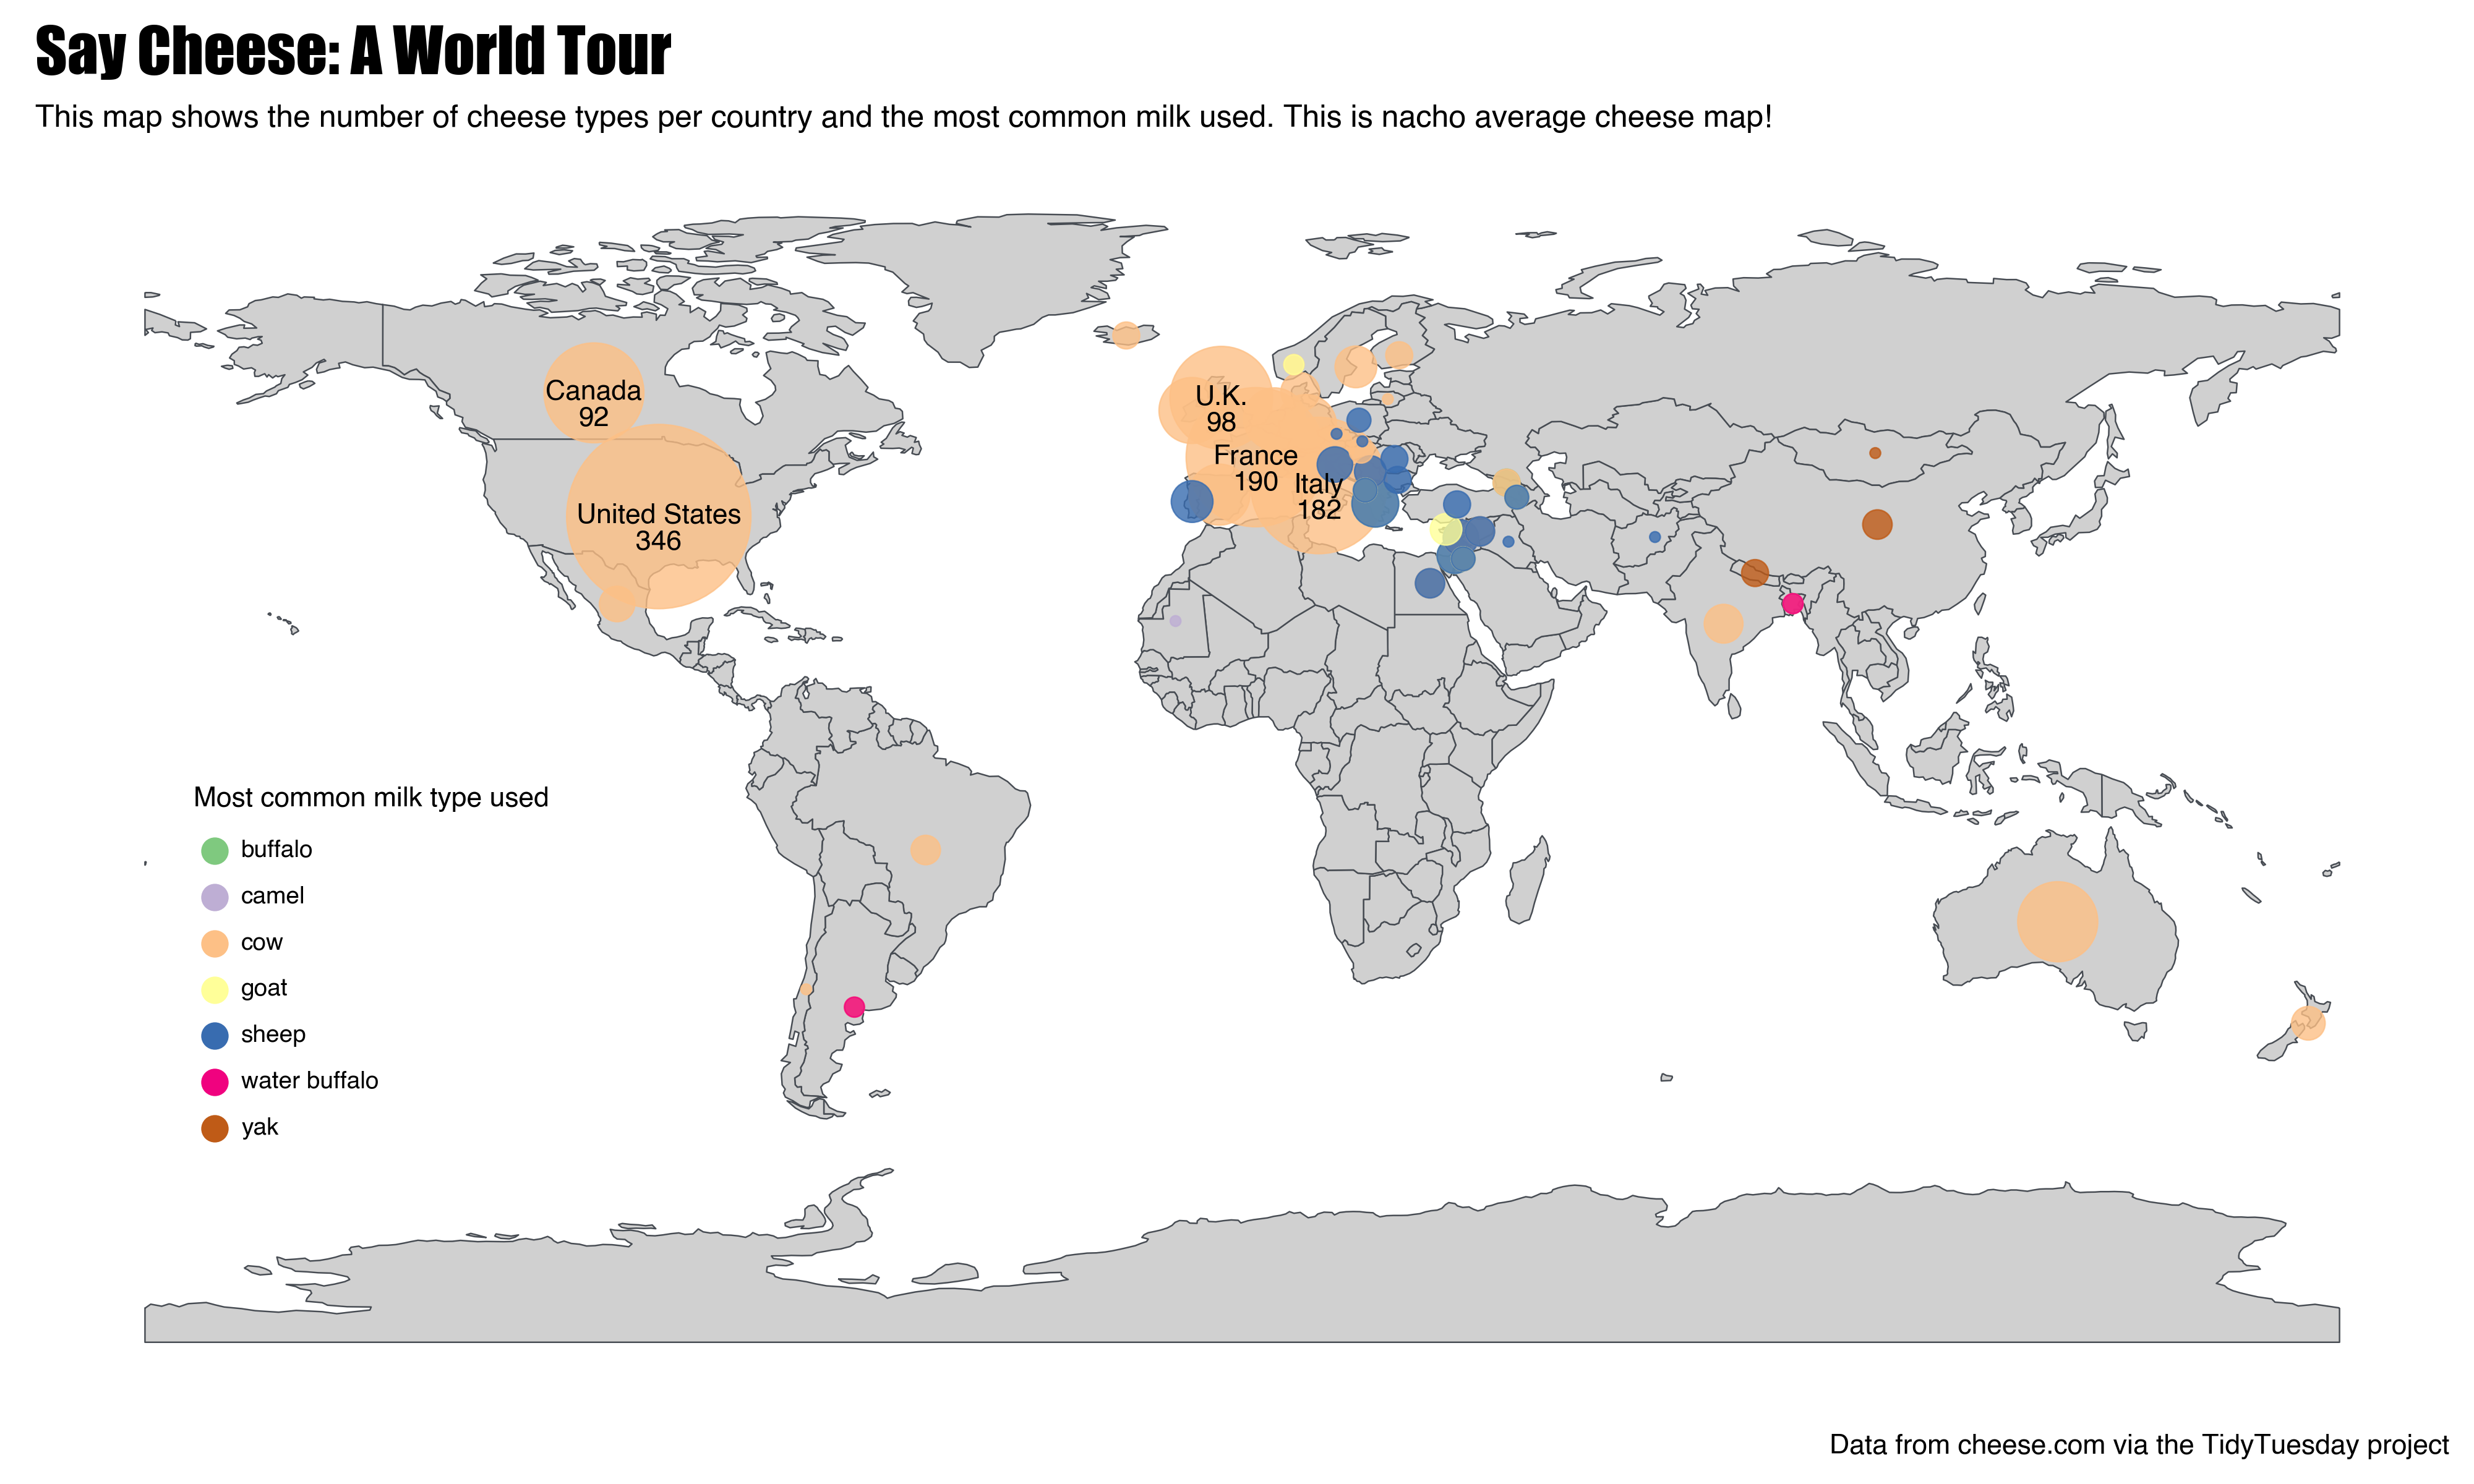

<Figure Size: (2000 x 1200)>

In [5]:
(
    ggplot()
    + geom_map(world_lowres, color="#474c53", fill="#d0d0d0", stroke="1")
    + geom_point(
        data=cheese_plot,
        mapping=aes(x="longitude", y="latitude", size="count", color="milk"),
        alpha=0.8,
    )
    + geom_text(
        top_countries,
        aes(x="longitude", y="latitude", label="country"),
        fontweight="bold",
        size=16,
    )
    + geom_text(
        top_countries,
        aes(x="longitude", y="latitude", label="count"),
        nudge_y=-4,
        size=16,
    )
    + labs(
        title="Say Cheese: A World Tour",
        subtitle="This map shows the number of cheese types per country and the most common milk used. This is nacho average cheese map!",
        caption="Data from cheese.com via the TidyTuesday project",
        color="Most common milk type used",
    )
    + theme_void()
    + scale_size(range=(3, 60), guide=None)
    + scale_colour_brewer(type="qual", palette="Accent")
    + theme(
        figure_size=(20, 12),
        legend_text_legend=element_text(size=14),
        legend_direction="vertical",
        legend_title=element_text(size=16),
        legend_position=(0.15, 0.35),
        plot_title=element_text(size=36, family="fantasy"),
        plot_subtitle=element_text(size=18),
        plot_caption=element_text(size=16),
    )
    + guides(colour=guide_legend(override_aes={"size": 8, "alpha": 1}))
)

If you're interested in entering the plot contest, but aren't sure what data to use, here are a few options that look like a lot of fun:

- [Verified oldest people](https://github.com/rfordatascience/tidytuesday/blob/master/data/2023/2023-05-30/readme.md)
- [Valentine's Day consumer data](https://github.com/rfordatascience/tidytuesday/blob/master/data/2024/2024-02-13/readme.md)
- [The Great American Coffee Taste Test](https://github.com/rfordatascience/tidytuesday/blob/master/data/2024/2024-05-14/readme.md)

Hope to see some of your plots! 

_cheers, isabel_

[^1]: Truthfully, I made this plot because I'm a data nerd with a weird idea of fun. Since I'm an employee of the company Posit (who is sponsoring this contest), I cannot actually enter. *But you can!* Prizes include fun swag, subscriptions to services to host your portfolio, and the priceless bragging rights of being a open source plotting champion 🏆